In [1]:
import time
import warnings
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.table import vstack, Table
from astroquery.simbad import Simbad
from astroquery.simbad.core import BlankResponseWarning
from exod.post_processing.crossmatch import crossmatch_simbad, crossmatch_simbad_chunk
from exod.post_processing.crossmatch_simulation import get_unique_sources
from exod.utils.plotting import set_latex_font
from exod.post_processing.crossmatch import crossmatch_dr14_slim
warnings.filterwarnings("ignore", category=BlankResponseWarning)
set_latex_font()

In [75]:
'potato'.index('sdfv')

ValueError: substring not found

<ErrorbarContainer object of 3 artists>

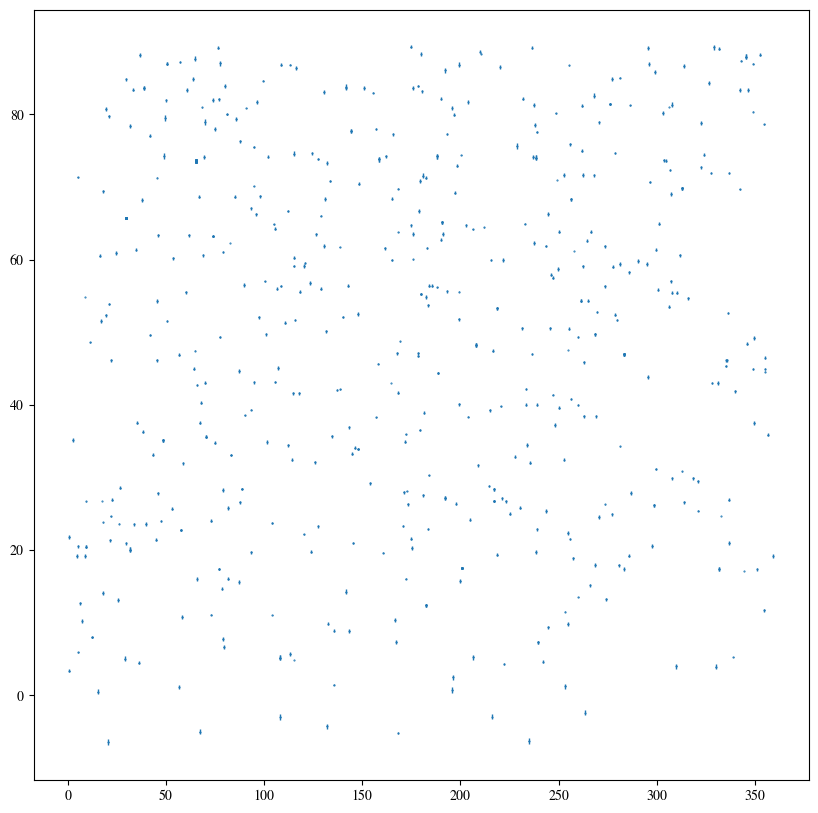

In [68]:
tab_chime = Table.read('../data/util/chimefrbcat1.fits')
sc_chime = SkyCoord(ra=tab_chime['ra'], dec=tab_chime['dec'])
plt.figure(figsize=(10,10))
plt.errorbar(x=tab_chime['ra'], y=tab_chime['dec'], xerr=tab_chime['ra_err'], yerr=tab_chime['dec_err'], ls='none', lw=1.0, capsize=0.0, marker='.', markersize=1.0)


In [69]:
tab_chime

tns_name,previous_name,repeater_name,ra,ra_err,ra_notes,dec,dec_err,dec_notes,gl,gb,exp_up,exp_up_err,exp_up_notes,exp_low,exp_low_err,exp_low_notes,bonsai_snr,bonsai_dm,low_ft_68,up_ft_68,low_ft_95,up_ft_95,snr_fitb,dm_fitb,dm_fitb_err,dm_exc_ne2001,dm_exc_ymw16,bc_width,scat_time,scat_time_err,scat_time_up_lim,flux,flux_err,flux_notes,fluence,fluence_err,fluence_notes,sub_num,mjd_400,mjd_400_err,mjd_inf,mjd_inf_err,width_fitb,width_fitb_err,width_fitb_up_lim,sp_idx,sp_idx_err,sp_run,sp_run_err,high_freq,low_freq,peak_freq,chi_sq,dof,flag_frac,excluded_flag
,,,deg,deg,,deg,deg,,deg,deg,h,h,,h,h,,,pc / cm3,Jy ms,Jy ms,Jy ms,Jy ms,,pc / cm3,pc / cm3,pc / cm3,pc / cm3,s,s,s,,Jy,Jy,,Jy ms,Jy ms,,,MJD,MJD,MJD,MJD,s,s,,,,,,MHz,MHz,MHz,,,,
bytes12,bytes15,bytes12,float64,float32,bytes45,float64,float32,bytes45,float32,float32,float32,float32,bytes164,float32,float32,bytes164,float32,float32,float32,float32,float32,float32,float32,float64,float32,float32,float32,float32,float64,float64,bool,float32,float32,bytes84,float32,float32,bytes87,int16,float64,float64,float64,float64,float64,float64,bool,float32,float32,float32,float32,float32,float32,float32,float64,int32,float32,int16
FRB20180725A,180725.J0613+67,-9999,93.42,0.039,-9999,67.07,0.21,-9999,147.29,21.29,30.0,18.0,-9999,-9999.0,-9999.0,-9999,19.2,716.6,0.0,2.7,0.0,5.0,33.2,715.8093,0.0041,644.2,635.4,0.00295,0.0011,0.00032,False,1.7,1.0,-9999,4.1,2.3,-9999,0,58324.7498032059,1.8e-09,58324.7495885601,2.2e-09,0.000296,7.6e-05,False,38.2,3.7,-45.8,4.2,760.1,485.3,607.4,371857.954,371481,0.403,1
FRB20180727A,180727.J1311+26,-9999,197.72,0.13,-9999,26.42,0.26,-9999,24.76,85.6,10.4,7.1,-9999,-9999.0,-9999.0,-9999,10.4,642.1,0.0,1.9,0.0,3.1,12.2,642.134,0.015,620.9,622.4,0.00295,0.0017,-9999.0,True,0.58,0.31,-9999,2.31,0.76,-9999,0,58326.0362615845,3.7e-09,58326.0360690313,5.8e-09,0.00139,0.00017,False,3.8,1.8,-9.2,3.0,800.2,400.2,493.3,382969.318,381818,0.387,1
FRB20180729A,180729.J1316+55,-9999,199.4,0.12,-9999,55.58,0.084,-9999,115.26,61.16,21.0,11.0,-9999,-9999.0,-9999.0,-9999,32.0,108.4,0.0,4.6,0.0,8.6,206.6,109.59418,0.00031,78.8,86.8,0.00098,0.0001574,3.6e-06,False,11.7,6.8,-9999,17.0,10.0,-9999,0,58328.03356479831,3.2e-10,58328.0335319349,3.4e-10,0.0001,-9999.0,True,16.46,0.24,-30.21,0.38,692.7,400.2,525.6,264732.041,186953,0.399,1
FRB20180729B,180729.J0558+56,-9999,89.93,0.27,-9999,56.5,0.24,-9999,156.9,15.68,21.0,12.0,-9999,-9999.0,-9999.0,-9999,12.4,318.6,0.0,0.9,0.0,1.7,22.0,317.2235,0.0045,223.2,198.8,0.00197,0.00066,0.00018,False,0.92,0.59,-9999,1.2,0.74,-9999,0,58328.7280323977,3.7e-09,58328.7279372735,4e-09,0.000314,8.3e-05,False,14.5,3.5,-14.6,3.5,800.2,441.8,657.5,425139.488,421337,0.323,1
FRB20180730A,180730.J0353+87,-9999,57.39,0.032,-9999,87.19,0.2,-9999,125.11,25.11,270.0,110.0,-9999,214.0,99.0,-9999,69.5,849.2,3.3,2.3,6.1,4.4,89.8,848.9041,0.0018,789.7,790.5,0.00492,0.002073,7.4e-05,False,5.2,2.8,-9999,27.0,12.0,-9999,0,58329.1511342663,1.2e-09,58329.15087971,1.3e-09,0.000468,4e-05,False,4.27,0.3,-11.31,0.48,759.2,400.2,483.5,429165.844,417689,0.329,1
FRB20180801A,180801.J2130+72,-9999,322.53,0.059,-9999,72.72,0.22,-9999,109.21,15.46,39.0,22.0,-9999,31.0,17.0,-9999,20.4,656.7,31.0,4.4,66.9,8.4,40.9,655.728,0.016,565.6,547.7,0.00983,0.00554,0.00037,False,1.11,0.65,-9999,7.9,4.8,-9999,0,58331.3662498721,3.6e-09,58331.3660532425,6e-09,0.00058,0.00021,False,60.0,4.8,-75.5,5.7,709.3,500.2,595.6,804325.253,800121,0.357,1
FRB20180806A,180806.J1515+75,-9999,228.56,0.071,-9999,75.62,0.39,-9999,112.27,38.4,48.0,26.0,-9999,39.0,20.0,-9999,13.9,739.2,2.5,0.4,4.6,0.8,14.4,739.9482,0.008,699.3,706.0,0.00295,0.0016,-9999.0,True,1.9,1.8,-9999,7.6,6.6,-9999,0,58336.5925115761,3.3e-09,58336.5922896918,4.1e-09,0.00141,0.00012,False,0.1,1.2,-0.1,1.6,800.2,400.2,665.3,370874.518,369658,0.406,1
FRB20180810A,180810.J0646+34,-9999,101.47,0.13,-9999,34.86,0.24,-9999,180.67,14.06,15.0,8.3,-9999,-9999.0,-9999.0,-9999,13.1,415.7,0.0,1.5,0.0,2.7,16.5,414.8804,0.004,310.2,274.7,0.00197,0.0002

In [2]:
df_regions = pd.read_csv('../data/results_combined/merged_with_dr14/df_regions.csv')
df_regions

,label,bbox-0,bbox-1,bbox-2,bbox-3,centroid-0,centroid-1,weighted_centroid-0,weighted_centroid-1,intensity_mean,...,area_bbox,x_img,y_img,X,Y,ra,dec,ra_deg,dec_deg,runid
0,0,32,22,33,23,32.000000,22.000000,32.000000,22.000000,12.000000,...,1.0,200.930233,130.604651,16074.418605,10448.372093,0h39m12.29s,-43d49m30.54s,9.801227,-43.825151,0911990501_0_5_0.2_2.0
1,1,40,31,41,32,40.000000,31.000000,40.000000,31.000000,135.000000,...,1.0,241.116279,175.813953,19289.302326,14065.116279,0h38m57.42s,-43d46m30.02s,9.739232,-43.775004,0911990501_0_5_0.2_2.0
2,2,45,77,46,78,45.000000,77.000000,45.000000,77.000000,211.000000,...,1.0,266.232558,406.883721,21298.604651,32550.697674,0h38m48.05s,-43d31m05.87s,9.700222,-43.518297,0911990501_0_5_0.2_2.0
3,3,74,71,75,72,74.000000,71.000000,74.000000,71.000000,156.000000,...,1.0,411.906977,376.744186,32952.558140,30139.534884,0h37m54.46s,-43d33m06.26s,9.476927,-43.551739,0911990501_0_5_0.2_2.0
4,4,78,57,79,58,78.000000,57.000000,78.000000,57.000000,135.000000,...,1.0,432.000000,306.418605,34560.000000,24513.488372,0h37m47.02s,-43d37m47.42s,9.445900,-43.629838,0911990501_0_5_0.2_2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60122,0,35,47,40,50,37.666667,47.777778,38.481181,47.907398,45252.111111,...,15.0,288.742675,310.976696,23099.414029,24878.135679,9h55m50.90s,69d40m45.25s,148.962088,69.679237,0932391001_0_200_0.2_12.0
60123,1,35,52,36,53,35.000000,52.000000,35.000000,52.000000,1879.000000,...,1.0,271.255814,331.534884,21700.465116,26522.790698,9h56m04.37s,69d42m07.33s,149.018201,69.702035,0932391001_0_200_0.2_12.0
60124,2,37,53,38,54,37.000000,53.000000,37.000000,53.000000,2747.000000,...,1.0,281.302326,336.558140,22504.186047,26924.651163,9h55m56.65s,69d42m27.52s,148.986061,69.707644,0932391001_0_200_0.2_12.0
60125,3,43,44,44,45,43.000000,44.000000,43.000000,44.000000,1407.000000,...,1.0,311.441860,291.348837,24915.348837,23307.906977,9h55m33.47s,69d39m26.85s,148.889440,69.657460,0932391001_0_200_0.2_12.0


In [24]:
df_regions_unique = get_unique_sources(df_regions, clustering_radius=0.25*u.arcsec)
df_regions_unique

2024-05-28 16:21:59,640 - INFO - crossmatch_simulation.py:get_unique_sources - A total of 38648 unique sources were found from 60127 sources within a clustering radius of 0.25 arcsec


,ra_deg,dec_deg,idxs,count
0,9.801227,-43.825151,[0],1
1,9.739232,-43.775004,"[1, 7]",2
2,9.700222,-43.518297,"[2, 8]",2
3,9.476927,-43.551739,"[3, 9]",2
4,9.445900,-43.629838,"[4, 10, 13, 16, 18]",5
...,...,...,...,...
38643,148.962088,69.679237,[60122],1
38644,149.018201,69.702035,[60123],1
38645,148.986061,69.707644,[60124],1
38646,148.889440,69.657460,[60125],1


In [28]:
tab_cmatch_xmm = crossmatch_dr14_slim(df_regions_unique)

2024-05-28 16:25:23,288 - INFO - crossmatch.py:crossmatch_dr14_slim - Crossmatching with 4XMM DR14 slim catalogue


In [115]:

Simbad.TIMEOUT = 1000

In [30]:
tab_crossmatch = crossmatch_simbad_chunk(df_region=df_regions_unique, radius=30*u.arcsec, chunk_size=100)

2024-05-27 15:04:34,625 - INFO - crossmatch.py:crossmatch_simbad_chunk - 0 / 38648
2024-05-27 15:04:34,630 - INFO - crossmatch.py:crossmatch_simbad - Crossmatching df_region n_reg=100 with SIMBAD, radius=30.0 arcsec
2024-05-27 15:04:34,705 - INFO - crossmatch.py:crossmatch_simbad - Querying Region (This can take a while...)
2024-05-27 15:04:36,226 - INFO - crossmatch.py:crossmatch_simbad - Found 4106 results
2024-05-27 15:04:36,226 - INFO - crossmatch.py:crossmatch_simbad - Appending region coordinates to table...
2024-05-27 15:04:38,739 - INFO - crossmatch.py:crossmatch_simbad - Calculating separations...
2024-05-27 15:04:39,756 - INFO - crossmatch.py:crossmatch_simbad - Keeping Only closest match for each region
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 631.71it/s]
2024-05-27 15:04:40,014 - INFO - cros

In [31]:
#tab_crossmatch.write('../data/results_combined/merged_with_dr14/df_regions_unique_cmatch.csv', format='csv')

In [25]:
tab_crossmatch = Table.read('../data/results_combined/merged_with_dr14/df_regions_unique_cmatch.csv', format='csv')

In [26]:
df_crossmatch = tab_crossmatch.to_pandas()

In [27]:
df_crossmatch['OTYPE'].value_counts(dropna=False)

OTYPE
NaN                     23396
Star                     2378
Galaxy                   1905
X                        1057
Seyfert1                  671
                        ...  
SB*_Candidate               1
HorBranch*_Candidate        1
Variable*_Candidate         1
RRLyrae_Candidate           1
YellowSG                    1
Name: count, Length: 166, dtype: int64

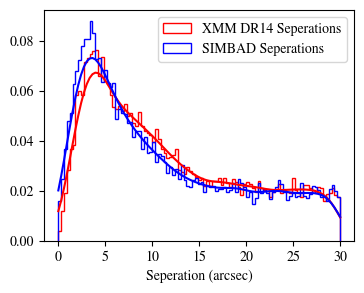

In [60]:
plt.figure(figsize=(4,3))
plt.hist(tab_cmatch_xmm['SEP_ARCSEC'], bins=np.linspace(0,30,100), histtype='step', label='XMM DR14 Seperations', density=True, color='red')
plt.hist(df_crossmatch['SEP_ARCSEC'], bins=np.linspace(0,30,100), histtype='step', label='SIMBAD Seperations', density=True, color='blue')

kde1 = stats.gaussian_kde(tab_cmatch_xmm[tab_cmatch_xmm['SEP_ARCSEC'] < 30]['SEP_ARCSEC'])
kde2 = stats.gaussian_kde(df_crossmatch[df_crossmatch['SEP_ARCSEC'] < 30]['SEP_ARCSEC'])

x = np.linspace(0,30,100)
plt.plot(x, kde1.pdf(x), color='red')
plt.plot(x, kde2.pdf(x), color='blue')
plt.xlabel('Seperation (arcsec)')
plt.legend()

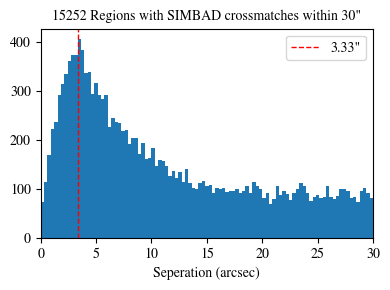

In [182]:
plt.figure(figsize=(4,3))
hist = plt.hist(df_crossmatch['SEP_ARCSEC'], bins=np.linspace(0,30,100), rasterized=True)
idx = np.argmax(hist[0])
sep_max = hist[1][idx]

plt.xlim(0,30)
plt.axvline(sep_max, color='red', label=f'{sep_max:.2f}"', lw=1.0, ls='dashed')
plt.xlabel('Seperation (arcsec)')
plt.title(f'{len(df_crossmatch[df_crossmatch["SEP_ARCSEC"]!=9999])} Regions with SIMBAD crossmatches within 30"', size=10)
plt.legend()
plt.tight_layout()
plt.savefig('../data/plots/SIMBAD_seperations.png')
plt.savefig('../data/plots/SIMBAD_seperations.pdf')
plt.show()

In [197]:
df_crossmatch['OTYPE'].value_counts()

OTYPE
Star                    2378
Galaxy                  1905
X                       1057
Seyfert1                 671
GtowardsCl               546
                        ... 
HotSubdwarf                1
SB*_Candidate              1
Variable*_Candidate        1
HorBranch*_Candidate       1
YellowSG                   1
Name: count, Length: 165, dtype: int64

Text(0.5, 1.0, 'Sources with SIMBAD countparts within 30": 15252')

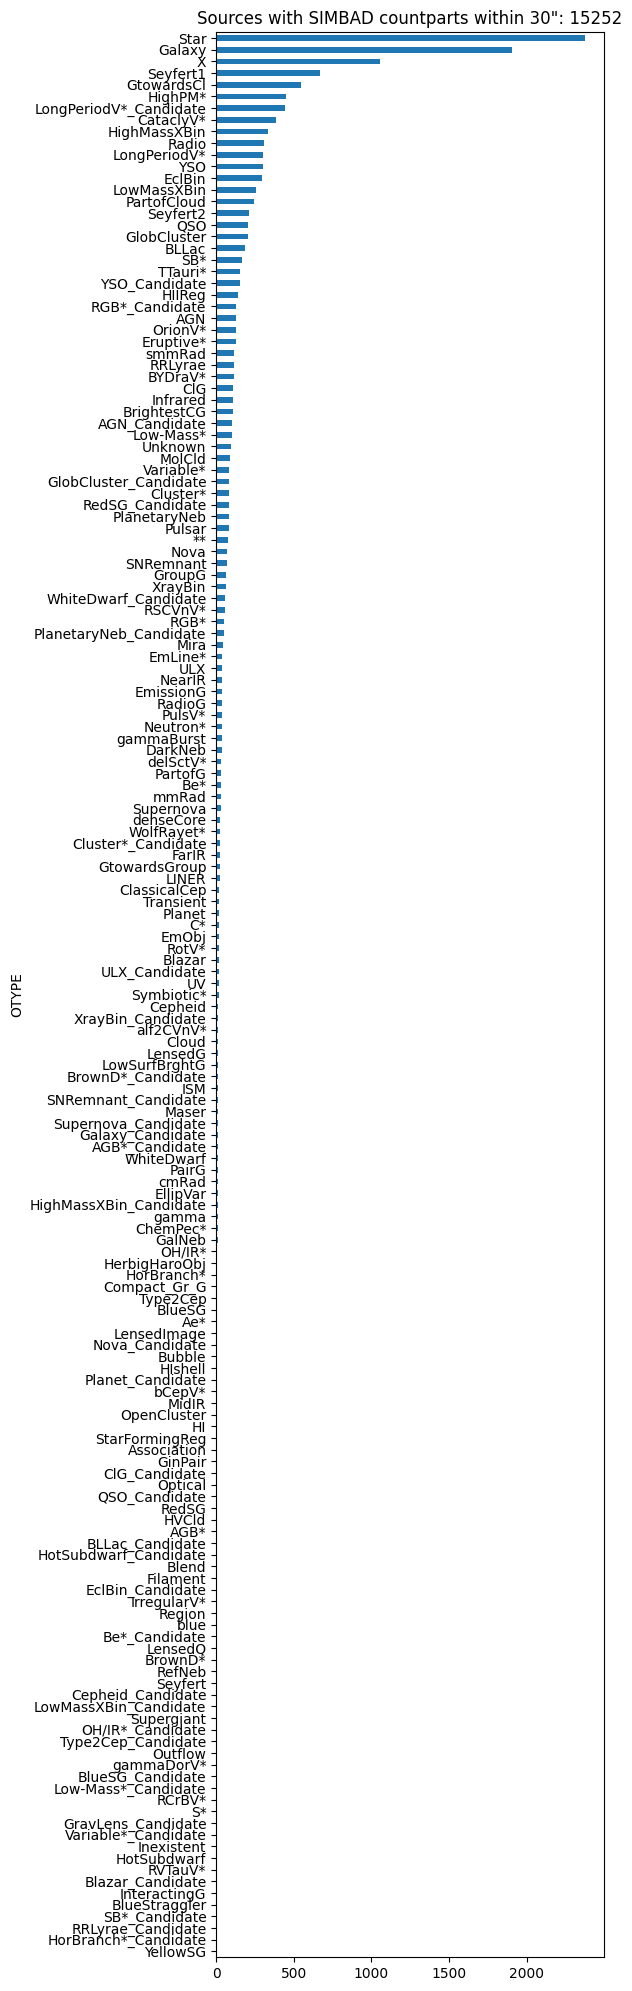

In [120]:
df_crossmatch['OTYPE'].value_counts(ascending=True).plot(kind='barh', figsize=(5,25)) #dropna=False
plt.title(f'Sources with SIMBAD countparts within 30": {df_crossmatch['OTYPE'].value_counts(ascending=True).sum()}')

In [121]:
df_crossmatch['OTYPE'].value_counts(normalize=True)

OTYPE
Star                    0.155914
Galaxy                  0.124902
X                       0.069302
Seyfert1                0.043994
GtowardsCl              0.035799
                          ...   
HotSubdwarf             0.000066
SB*_Candidate           0.000066
Variable*_Candidate     0.000066
HorBranch*_Candidate    0.000066
YellowSG                0.000066
Name: proportion, Length: 165, dtype: float64

In [122]:
u_dict = {'pc'  : u.pc,
          'kpc' : u.kpc,
          'Mpc' : u.Mpc}
mask = (tab_crossmatch['Distance_distance'] == None).mask
mask = ~mask
units = [u_dict[i] for i in tab_crossmatch[mask]['Distance_unit']]
dist = tab_crossmatch[mask]['Distance_distance'] * units
dist_pc = [d.to('pc').value for d in dist]

In [61]:
plt.title(f'{len(dist_pc)} sources with distances')
plt.hist(np.log10(dist_pc),bins=75)
plt.xlabel('Distance | log10(pc)')

NameError: name 'dist_pc' is not defined

In [124]:
df_crossmatch['Distance_method'].value_counts()

Distance_method
paral       3315
redshift     185
ST-L         131
kin           88
T-F           50
CaIIHK         7
RRLyr          5
unknown        5
|ST-L          4
Flow           1
Cep            1
Name: count, dtype: int64

Text(0.5, 1.0, 'Counterpart Wavelength')

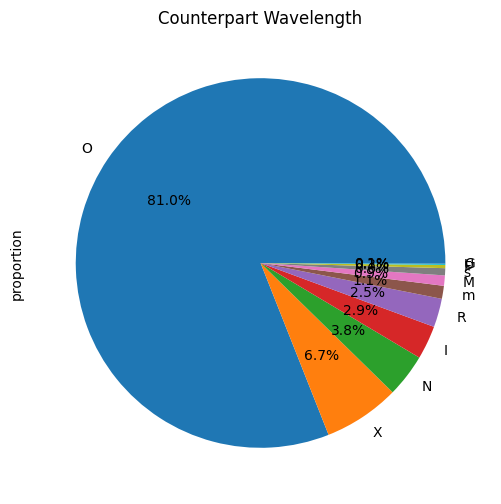

In [125]:
df_crossmatch['COO_WAVELENGTH'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title('Counterpart Wavelength')

In [126]:
df_crossmatch['Distance_method'].value_counts()

Distance_method
paral       3315
redshift     185
ST-L         131
kin           88
T-F           50
CaIIHK         7
RRLyr          5
unknown        5
|ST-L          4
Flow           1
Cep            1
Name: count, dtype: int64

In [127]:
df_crossmatch['Distance_bibcode'].value_counts()

Distance_bibcode
2020yCat.1350....0G    2966
2018yCat.1345....0G     334
2004MNRAS.354..355J     115
2007ApJ...655..790C     115
2020AJ....160...83S     106
                       ... 
2002A&A...391..923G       1
2004ARA&A..42..685Z       1
2010ApJ...714.1096S       1
2015ApJ...812....3W       1
2015ApJ...815...22K       1
Name: count, Length: 75, dtype: int64

In [128]:
mask = df_crossmatch['SEP_ARCSEC'] == 9999
df_cmatch = df_crossmatch[~mask]
df_no_cmatch = df_crossmatch[mask]

In [129]:
from exod.utils.plotting import plot_aitoff

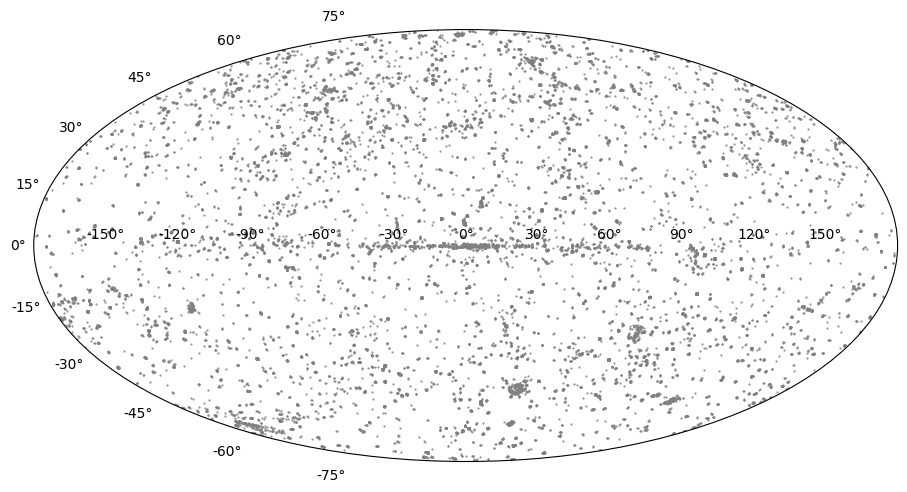

In [130]:
plot_aitoff(df_no_cmatch['RA_REGION_DEG'], df_no_cmatch['DEC_REGION_DEG'])

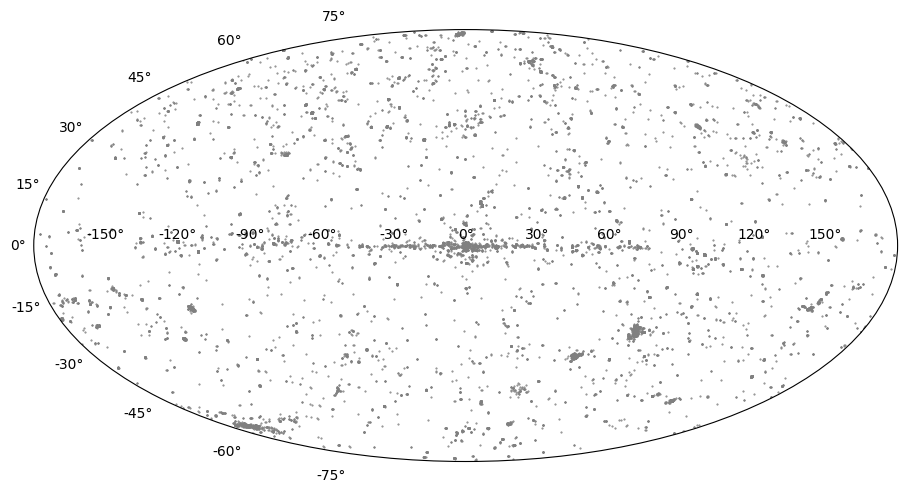

In [131]:
plot_aitoff(df_cmatch['RA_REGION_DEG'], df_cmatch['DEC_REGION_DEG'])

In [132]:
sc = SkyCoord(ra=df_cmatch['RA'], dec=df_cmatch['DEC'], unit=(u.hourangle, u.deg))

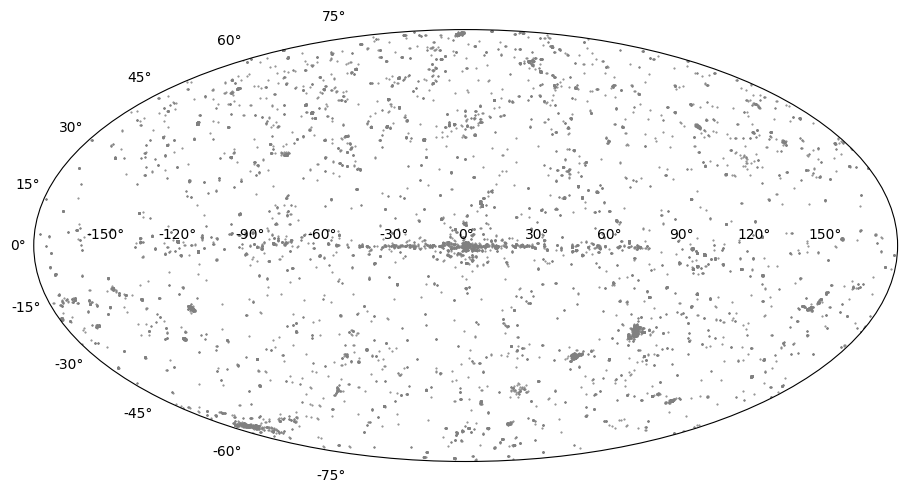

In [67]:
plot_aitoff(sc.ra.deg, sc.dec.deg)

In [199]:
df_otype = pd.read_csv('../data/util/otypes_nodes-1.csv')
df_otype

,Id,Label,Candidate,Description,Category,Subcategory,Comment,Status,Priority
0,?,Unknown,NaN,Object of Unknown Nature,"8. BLENDS, ERRORS, NOT WELL DEFINED OBJECTS",NaN,NaN,NaN,NaN
1,..1,NaN,NaN,{pr*} Pre-Main Sequence Star,1. TAXONOMY OF STARS,Young Stellar Objects (Pre-Main Sequence Stars),= Y*O,old,NaN
2,..10,NaN,NaN,Barium Star,1. TAXONOMY OF STARS,Chemically Peculiar Stars,Check the SpT,old,NaN
3,..11,NaN,NaN,Dwarf Carbon Star,1. TAXONOMY OF STARS,Chemically Peculiar Stars,Maintype = Pe* and SpT like dC,old,NaN
4,..12,NaN,NaN,Carbon-Enhanced Metal Poor Star,1. TAXONOMY OF STARS,Chemically Peculiar Stars,Maintype = Pe* and SpT like CEMP,old,NaN
...,...,...,...,...,...,...,...,...,...
180,WR*,WolfRayet*,WR?,Wolf-Rayet,1. TAXONOMY OF STARS,Massive Stars and their Remnants,SpT like W,NaN,NaN
181,WV*,Type2Cep,WV?,Type II Cepheid Variable,1. TAXONOMY OF STARS,Evolved Stars,Includes W Wir and BL Her subtypes,NaN,NaN
182,X,X,NaN,X-ray Source,7. GENERAL SPECTRAL PROPERTIES,NaN,NaN,NaN,NaN
183,XB*,XrayBin,XB?,X-ray Binary,1. TAXONOMY OF STARS,Interacting Binaries and close Common Proper M...,NaN,NaN,NaN


In [200]:
r = []
for otype in df_cmatch['OTYPE']:
    try:
        c = df_otype[df_otype['Label'] == otype]['Category'].iloc[0]
        r.append(c)
    except IndexError:
        r.append('None')

In [201]:
df_cmatch['OTYPE_sub'] = r

/tmp/ipykernel_18519/1450802294.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cmatch['OTYPE_sub'] = r


In [205]:
df_cmatch['OTYPE_sub'].value_counts(normalize=True)

OTYPE_sub
1. TAXONOMY OF STARS                           0.438172
4. TAXONOMY OF GALAXIES                        0.270325
7. GENERAL SPECTRAL PROPERTIES                 0.122017
None                                           0.083792
3. INTERSTELLAR MEDIUM                         0.027537
8. BLENDS, ERRORS, NOT WELL DEFINED OBJECTS    0.024849
2. SETS OF STARS                               0.019342
5. SETS OF GALAXIES                            0.012457
6. GRAVITATION                                 0.001508
Name: proportion, dtype: float64